In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

data = yf.download('AAPL', start='2013-10-01', end='2023-09-30')
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-10-01,17.087500,17.469286,17.084999,17.427143,15.170189,353883600
2013-10-02,17.343929,17.564285,17.276787,17.484285,15.219932,289184000
2013-10-03,17.518213,17.583929,17.169287,17.264643,15.028732,322753200
2013-10-04,17.280714,17.307142,17.092857,17.251072,15.016916,258868400
2013-10-07,17.377144,17.594643,17.333929,17.419643,15.163662,312292400
...,...,...,...,...,...,...
2023-09-25,174.199997,176.970001,174.149994,176.080002,175.624222,46172700
2023-09-26,174.820007,175.199997,171.660004,171.960007,171.514893,64588900
2023-09-27,172.619995,173.039993,169.050003,170.429993,169.988831,66921800


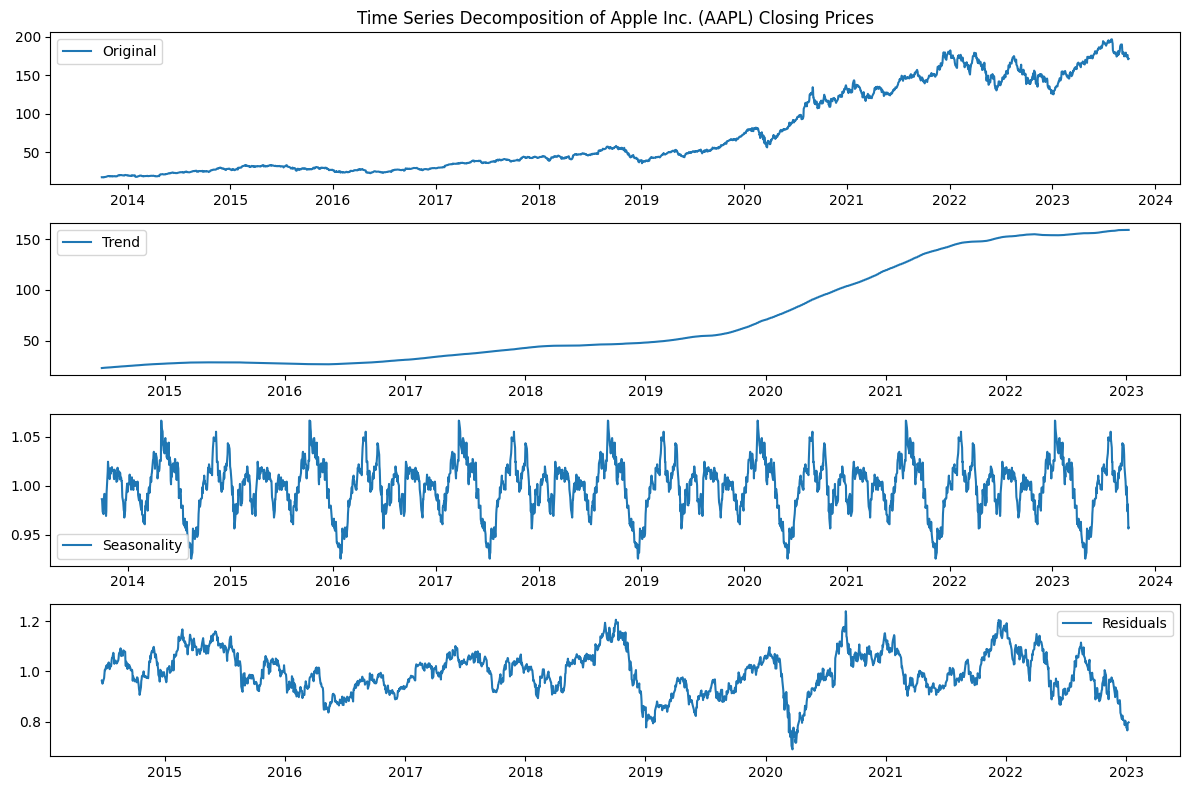

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decomposing the time series
decomposition = seasonal_decompose(data['Close'], model='multiplicative', period=365)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plotting the decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(data['Close'], label='Original')
plt.legend(loc='best')
plt.title('Time Series Decomposition of Apple Inc. (AAPL) Closing Prices')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()
plt.show()